In [62]:
# CPE 646 Final Project
# Face Reconstruction & Classification via Principal Component Analysis 
# Name: Hsuan-Kai Liu
# CWID: 10475509

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the datasets from sklearn.datasets and choose the data --- fetch_lfw_people
from sklearn.datasets import fetch_lfw_people

In [73]:
# the minimum for each face is 70 (data)
# resize each image RATIO=0.3
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.3)
# get the data
data = lfw_people.data 
# how many image we have and the size (heigh and width) of each image
n_samples, h, w = lfw_people.images.shape

In [74]:
# print how many image we have and the size
print("n_images:", n_samples, "h:", h, "w:", w)

n_images: 1288 h: 37 w: 28


In [75]:
# use panda to see what's in the data
# the gray scale of each image (row), 0 means black 255 means white
dataDF = pd.DataFrame(data)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,254.000000,253.000000,238.000000,171.333328,156.666672,192.666672,194.666672,192.666672,192.333328,187.666672,...,106.000000,100.666664,104.333336,102.333336,100.000000,95.333336,91.666664,89.666664,88.666664,87.333336
1,44.000000,53.666668,59.666668,106.666664,132.000000,156.000000,172.000000,181.333328,189.000000,196.000000,...,51.666668,44.666668,42.333332,54.333332,70.333336,79.000000,98.666664,121.333336,116.666664,125.000000
2,95.000000,120.333336,140.333328,151.666672,154.666672,158.666672,163.333328,169.666672,178.333328,183.333328,...,130.000000,136.333328,133.666672,119.666664,106.333336,118.666664,121.333336,133.666672,179.333328,183.333328
3,25.000000,10.000000,7.000000,33.000000,133.000000,167.666672,143.333328,96.333336,123.666664,110.333336,...,70.000000,78.666664,106.666664,172.333328,227.000000,238.000000,233.000000,108.666664,30.333334,49.666668
4,122.000000,123.000000,129.333328,130.333328,138.333328,143.000000,149.333328,154.000000,159.000000,169.333328,...,112.666664,85.333336,45.333332,20.333334,7.333333,6.333333,10.333333,11.666667,40.666668,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,22.000000,62.000000,96.000000,102.333336,107.000000,121.333336,137.000000,147.333328,155.333328,163.333328,...,105.666664,114.666664,126.333336,138.333328,134.333328,164.333328,229.000000,182.333328,61.000000,55.333332
1284,46.000000,50.000000,78.333336,131.333328,170.000000,178.666672,179.000000,168.666672,137.666672,159.666672,...,46.000000,69.333336,87.666664,75.333336,91.000000,97.333336,96.333336,89.333336,89.666664,113.333336
1285,85.000000,76.666664,91.000000,136.666672,175.333328,189.333328,196.000000,198.000000,199.333328,187.000000,...,48.333332,46.333332,47.666668,50.000000,52.333332,48.000000,43.000000,41.666668,47.333332,50.000000
1286,55.666668,81.666664,83.000000,87.333336,114.000000,95.333336,115.666664,139.000000,148.666672,160.666672,...,148.666672,150.666672,138.666672,141.000000,151.333328,169.666672,176.000000,194.000000,187.000000,169.000000


<Figure size 432x288 with 0 Axes>

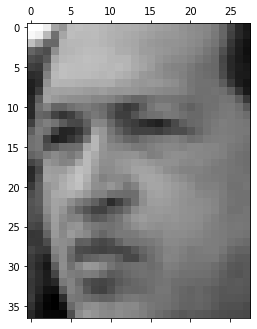

In [76]:
# we can see the information of each image by changing the data[] number
# if we choose image 0, as we can see, on the top left corner, it's almost white 
# so the corresponding number in the above table is 254
plt.gray()
plt.matshow(data[0].reshape(h,w)) 


In [77]:
# PCA model for dimensional reduction and data reconstruction
def PCA_model(data, num_features): # 1288 x 1036
  # mean of each row
  mean_data = data.mean(axis=0) # 1036 x 1
  # row data - mean, 
  x_m = np.subtract(data, mean_data) # 1288 x 1036
  # Scatter Martix covariance
  S = np.dot(x_m.transpose(), x_m) # 1036 x 1036
  # eignvalue 1036 x 1 & eigenvector 1036 x 1036
  [eigenvalue, eigenvector] =  np.linalg.eig(S)
  # return index array, max num at the end
  index_array = np.argsort(eigenvalue)
  # 1036 x 1
  e = eigenvector[:,index_array[-num_features:]]
  # num_features' dimensional projection #a = e.'(x - m) (num_features x 1036)  x  (1288 x 1036)
  a = np.dot(x_m, e)
  # reconstruction the image
  x = mean_data + np.dot(a, e.transpose())
  
  return x, mean_data, e, a

In [78]:
# keep 10 main feature
f10 = PCA_model(data, 10)
x10 = f10[0]

# keep 20 main feature
f20 = PCA_model(data, 20)
x20 = f20[0]

# keep 50 main feature
f50 = PCA_model(data, 50)
x50 = f50[0]

# keep 100 main feature
f100 = PCA_model(data, 100)
x100 = f100[0]

# keep 200 main feature
f200 = PCA_model(data, 200)
x200 = f200[0]

# keep 300 main feature
f300 = PCA_model(data, 300)
x300 = f300[0]

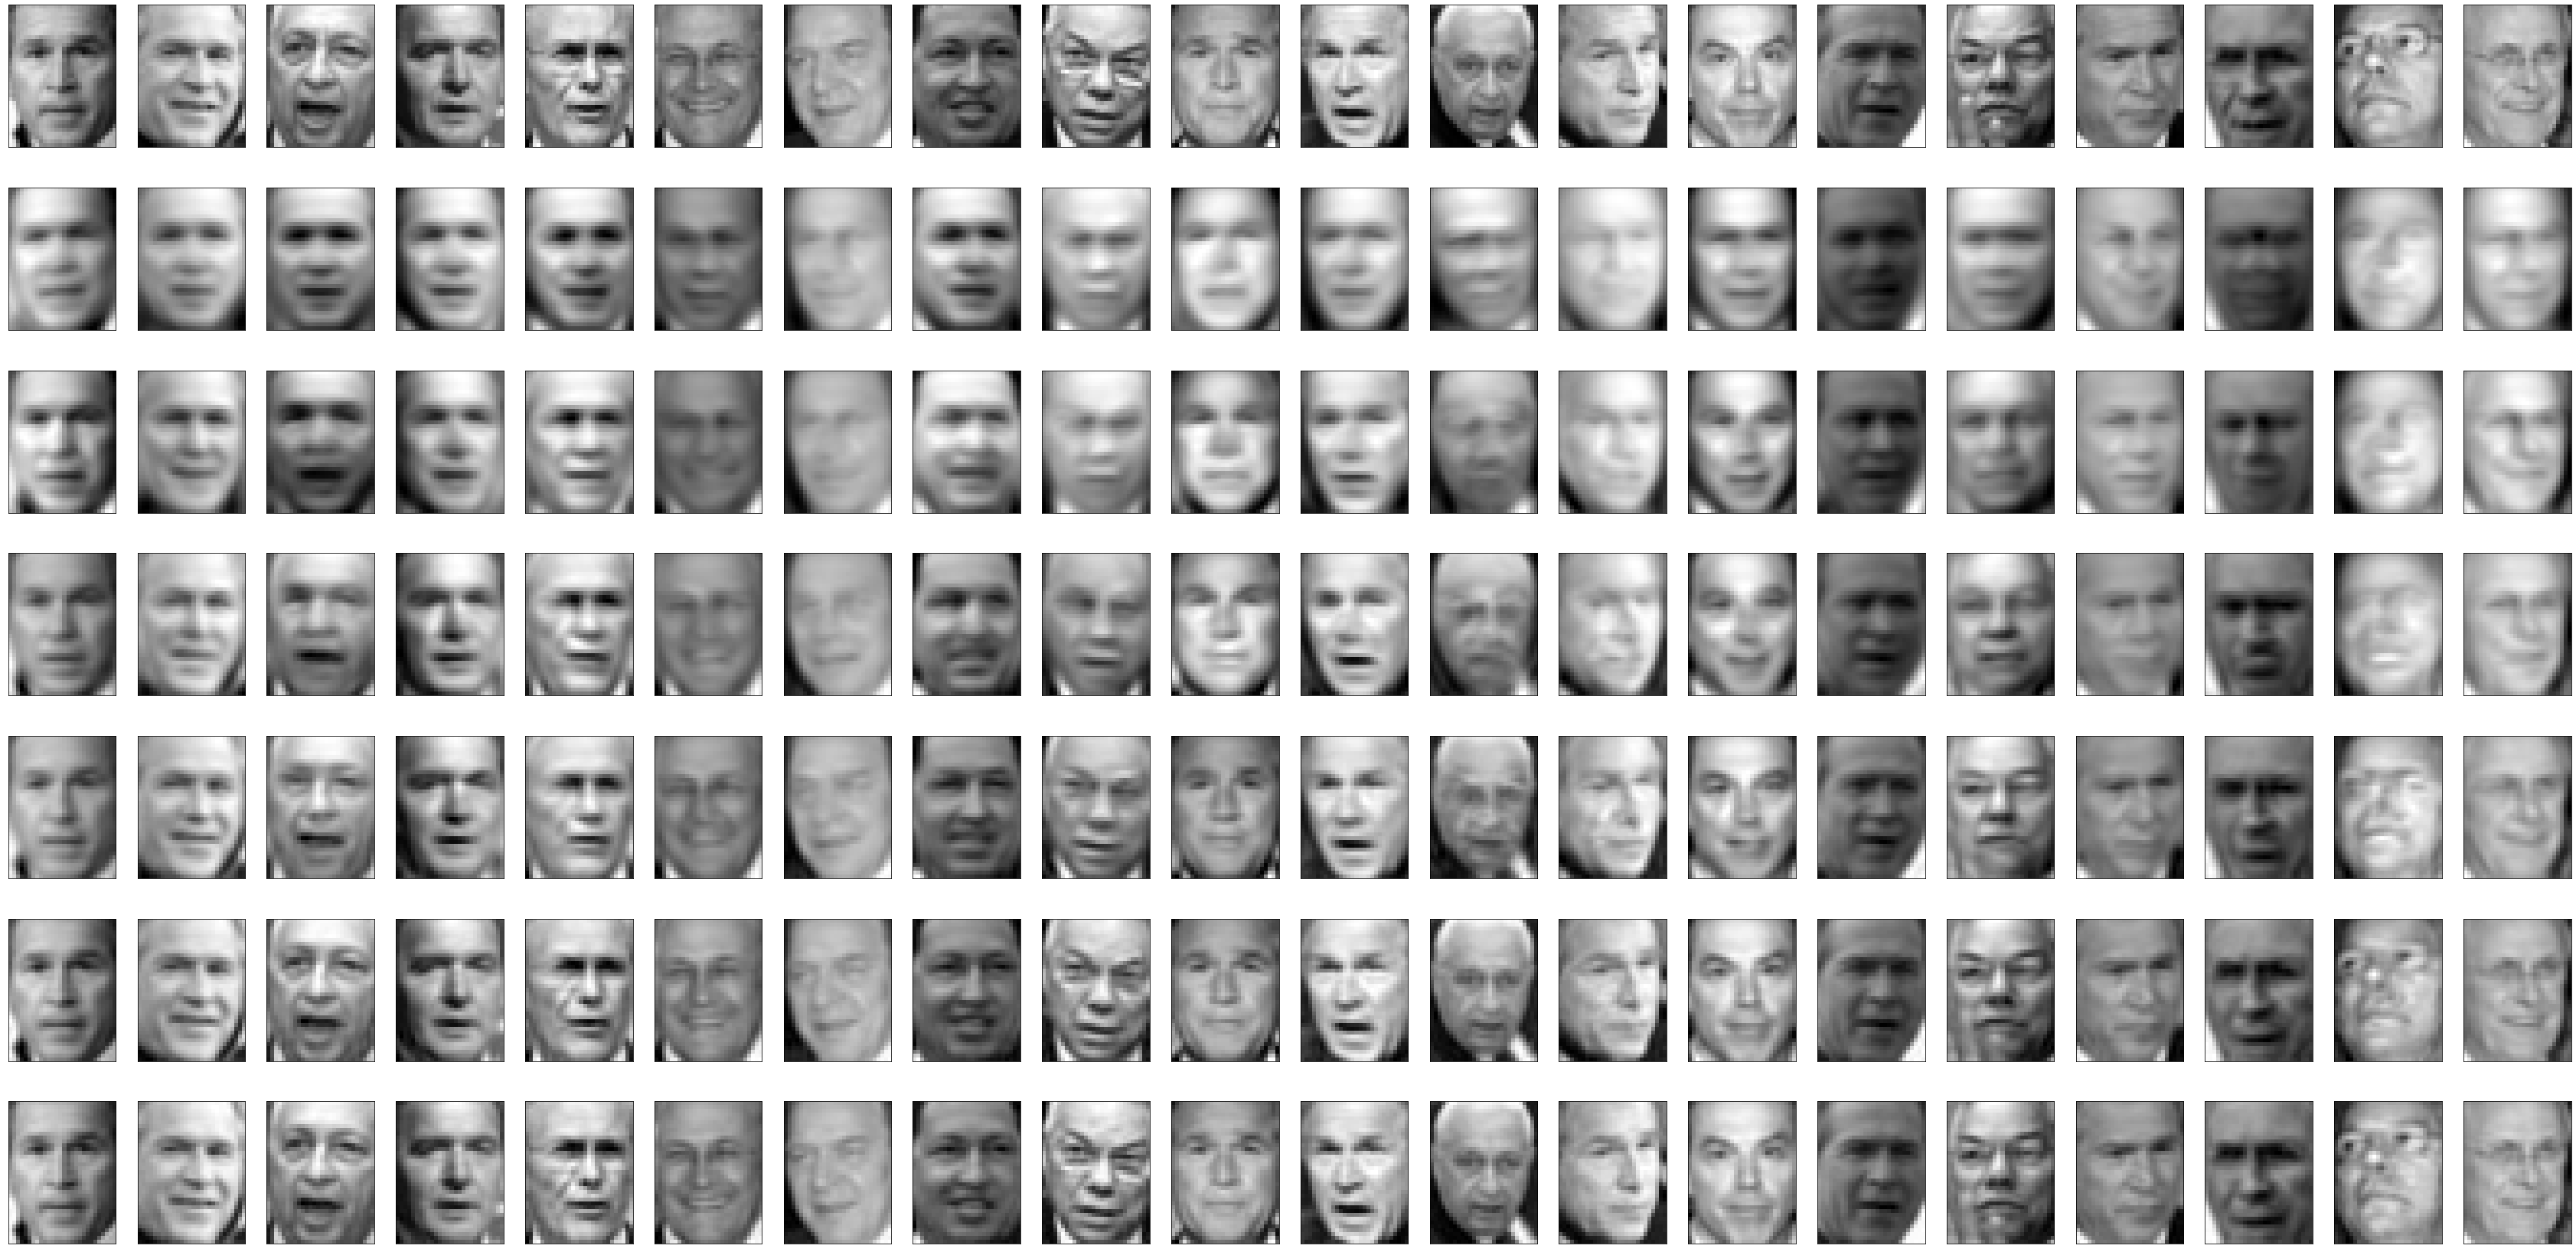

In [79]:
# how many image we want
n = 20
plt.figure(figsize=(60, 30))
for i in range(n):
  
    # display original
    ax = plt.subplot(7, n, i + 1)
    plt.imshow(data[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display x10 reconstruction
    ax = plt.subplot(7, n, i + 1 + n)
    plt.imshow(x10[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display x20 reconstruction
    ax = plt.subplot(7, n, i + 1 + 2*n)
    plt.imshow(x20[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display x50 reconstruction
    ax = plt.subplot(7, n, i + 1 + 3*n)
    plt.imshow(x50[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display x100 reconstruction
    ax = plt.subplot(7, n, i + 1 + 4*n)
    plt.imshow(x100[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display x200 reconstruction
    ax = plt.subplot(7, n, i + 1 + 5*n)
    plt.imshow(x200[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display x300 reconstruction
    ax = plt.subplot(7, n, i + 1 + 6*n)
    plt.imshow(x300[i+100].reshape(h,w))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
